## Project Update
### Date: 06/08/2021
### Team: Bryce Randolph, Jeannie Davis, Harsandeep Singh, Kevin Robell

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger
sns.set_theme(style="darkgrid")


### Choice of Dataset
Our dataset is focused on the 2019 season from this dataset of NBA games(games.csv). https://www.kaggle.com/nathanlauga/nba-games. We are choosing to make the program modular enough that other seasons can also be analyzed, but only a single season is chosen at a time to stay within the goals of the project. Drop the games.csv in the same folder as this file to run the following code.

In [2]:
df = pd.read_csv("./games.csv")
df = df[df.SEASON == 2019]
df2 = pd.read_csv("./teams.csv")

### What we are going to predict
We want to predict the winner of an NBA game based on the game stats from the 2019 season which is in the HOME_TEAM_WINS column.


### Predictors
To predict the winner of each game we will use all of the game stats except for the PTS_away and PTS_home columns. In addition, two predictors have been added, the REB_PCT_away and REB_PCT_home columns, based upon the REB_away and REB_home columns as seen below.

#### List of Predictors 
 8   FG_PCT_home       1241 non-null   float64   
 9   FT_PCT_home       1241 non-null   float64   
 10  FG3_PCT_home      1241 non-null   float64   
 11  AST_home          1241 non-null   float64   
 12  REB_home          1241 non-null   float64   
 15  FG_PCT_away       1241 non-null   float64   
 16  FT_PCT_away       1241 non-null   float64   
 17  FG3_PCT_away      1241 non-null   float64   
 18  AST_away          1241 non-null   float64   
 19  REB_away          1241 non-null   float64   
 21  REB_PCT_away      1241 non-null   float64   
 22  REB_PCT_home      1241 non-null   float64   

In [3]:
df['REB_PCT_away'] = df['REB_away'] / (df['REB_away'] + df['REB_home'])
df['REB_PCT_home'] = df['REB_home'] / (df['REB_away'] + df['REB_home'])

### Preprocessing
The dataset doesn't have any na values so it's unnecessary to drop columns for that reason. All games are final which means we don't need to drop partially completed games. At the same time, the columns GAME_DATE_EST, GAME_ID, GAME_STATUS_TEXT, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS_home, TEAM_ID_away, and PTS_away aren't used so they will all be dropped.

In [4]:
df.isna().sum() # Shows that data doesn't have NA values.

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
REB_PCT_away        0
REB_PCT_home        0
dtype: int64

In [5]:
(df['GAME_STATUS_TEXT'] != 'Final').sum() # Shows that all games are finished.

0

In [6]:
df = df.merge(df2, how='inner', left_on='HOME_TEAM_ID', right_on='TEAM_ID')

In [7]:
df.drop(['GAME_ID','GAME_STATUS_TEXT', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home','LEAGUE_ID','MIN_YEAR','MAX_YEAR', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY','OWNER', 'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION' ], axis =1,inplace = True)

### Exploration and Visualization
There's always a saying that when a team at home, they have a "home court/field advantage", so we want to explore the data to see whether that is actually true or not. 

In [8]:
df.info() # Basic data exploration

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1240
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GAME_DATE_EST   1241 non-null   object 
 1   HOME_TEAM_ID    1241 non-null   int64  
 2   PTS_home        1241 non-null   float64
 3   FG_PCT_home     1241 non-null   float64
 4   FT_PCT_home     1241 non-null   float64
 5   FG3_PCT_home    1241 non-null   float64
 6   AST_home        1241 non-null   float64
 7   REB_home        1241 non-null   float64
 8   TEAM_ID_away    1241 non-null   int64  
 9   PTS_away        1241 non-null   float64
 10  FG_PCT_away     1241 non-null   float64
 11  FT_PCT_away     1241 non-null   float64
 12  FG3_PCT_away    1241 non-null   float64
 13  AST_away        1241 non-null   float64
 14  REB_away        1241 non-null   float64
 15  HOME_TEAM_WINS  1241 non-null   int64  
 16  REB_PCT_away    1241 non-null   float64
 17  REB_PCT_home    1241 non-null   f

In [9]:
df.describe()

,HOME_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home,TEAM_ID
count,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03
mean,1.610613e+09,112.274778,0.463043,0.769757,0.359782,24.710717,45.438356,1.610613e+09,110.466559,0.455907,0.771137,0.353089,23.791297,44.197421,0.536664,0.493189,0.506811,1.610613e+09
std,8.505847e+00,12.781012,0.056152,0.098386,0.085668,4.850270,6.845032,8.505253e+00,12.447984,0.054403,0.102825,0.084250,4.851417,6.680293,0.498855,0.053270,0.053270,8.505847e+00
min,1.610613e+09,68.000000,0.269000,0.400000,0.118000,11.000000,24.000000,1.610613e+09,70.000000,0.308000,0.375000,0.094000,10.000000,25.000000,0.000000,0.321429,0.333333,1.610613e+09
25%,1.610613e+09,104.000000,0.425000,0.706000,0.300000,21.000000,41.000000,1.610613e+09,102.000000,0.418000,0.706000,0.297000,20.000000,40.000000,0.000000,0.458824,0.469388,1.610613e+09
50%,1.610613e+09,112.000000,0.462000,0.778000,0.359000,25.000000,45.000000,1.610613e+09,110.000000,0.455000,0.774000,0.353000,24.000000,44.000000,1.000000,0.493827,0.506173,1.610613e+09
75%,1.610613e+09,120.000000,0.505000,0.838000,0.417000,28.000000,50.000000,1.610613e+09,119.000000,0.494000,0.840000,0.406000,27.000000,48.000000,1.000000,0.530612,0.541176,1.610613e+09
max,1.610613e+09,158.000000,0.633000,1.000000,0.629000,43.000000,67.000000,1.610613e+09,159.000000,0.674000,1.000000,0.680000,40.000000,65.000000,1.000000,0.666667,0.678571,1.610613e+09


In [10]:
df.head()

,GAME_DATE_EST,HOME_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home,TEAM_ID,ABBREVIATION,NICKNAME
0,2020-10-11,1610612748,93.0,0.443,0.591,0.357,25.0,41.0,1610612747,106.0,...,0.643,0.314,23.0,46.0,0,0.528736,0.471264,1610612748,MIA,Heat
1,2020-10-06,1610612748,96.0,0.427,0.808,0.344,18.0,39.0,1610612747,102.0,...,0.857,0.359,25.0,42.0,0,0.518519,0.481481,1610612748,MIA,Heat
2,2020-10-04,1610612748,115.0,0.513,0.913,0.353,25.0,37.0,1610612747,104.0,...,0.759,0.333,23.0,43.0,1,0.537500,0.462500,1610612748,MIA,Heat
3,2020-09-27,1610612748,125.0,0.563,0.846,0.481,30.0,40.0,1610612738,113.0,...,0.800,0.326,26.0,42.0,1,0.512195,0.487805,1610612748,MIA,Heat
4,2020-09-23,1610612748,112.0,0.429,0.889,0.270,20.0,40.0,1610612738,109.0,...,0.810,0.350,28.0,46.0,1,0.534884,0.465116,1610612748,MIA,Heat


In [28]:
df.sort_values(by=['NICKNAME'])

,GAME_DATE_EST,HOME_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,...,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home,TEAM_ID,ABBREVIATION,NICKNAME,total
620,2019-12-18,1610612755,104.0,0.422,0.889,0.308,24.0,41.0,1610612748,108.0,...,0.387,26.0,47.0,0,0.534091,0.465909,1610612755,PHI,76ers,139333.0
612,2020-01-25,1610612755,108.0,0.526,0.684,0.351,19.0,41.0,1610612747,91.0,...,0.194,23.0,35.0,1,0.460526,0.539474,1610612755,PHI,76ers,139333.0
611,2020-01-28,1610612755,115.0,0.512,0.769,0.344,28.0,44.0,1610612744,104.0,...,0.375,29.0,40.0,1,0.476190,0.523810,1610612755,PHI,76ers,139333.0
610,2020-02-07,1610612755,119.0,0.533,0.600,0.560,34.0,50.0,1610612763,107.0,...,0.238,25.0,40.0,1,0.444444,0.555556,1610612755,PHI,76ers,139333.0
609,2020-02-09,1610612755,118.0,0.500,0.719,0.407,29.0,44.0,1610612741,111.0,...,0.375,23.0,42.0,1,0.488372,0.511628,1610612755,PHI,76ers,139333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2020-02-03,1610612764,117.0,0.506,0.828,0.409,28.0,35.0,1610612744,125.0,...,0.500,31.0,44.0,0,0.556962,0.443038,1610612764,WAS,Wizards,139333.0
894,2020-02-01,1610612764,113.0,0.440,0.615,0.281,21.0,51.0,1610612751,107.0,...,0.340,25.0,53.0,1,0.509615,0.490385,1610612764,WAS,Wizards,139333.0
895,2020-01-30,1610612764,121.0,0.477,0.926,0.378,24.0,57.0,1610612766,107.0,...,0.300,32.0,38.0,1,0.400000,0.600000,1610612764,WAS,Wizards,139333.0
897,2020-01-12,1610612764,116.0,0.505,0.882,0.318,28.0,37.0,1610612762,127.0,...,0.333,24.0,44.0,0,0.543210,0.456790,1610612764,WAS,Wizards,139333.0


<AxesSubplot:title={'center':'Average Home Wins per Team'}, xlabel='Home Team', ylabel='Avg Home Wins'>

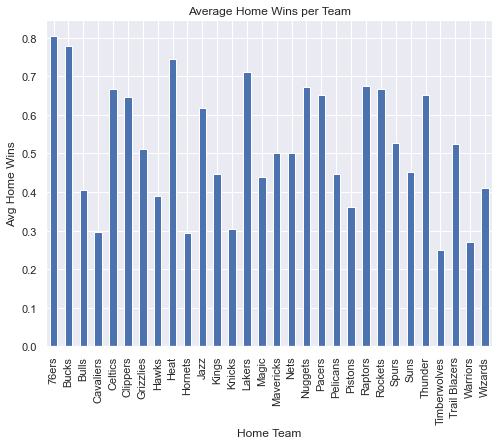

In [12]:
dfg = df.groupby (['NICKNAME'])['HOME_TEAM_WINS'].mean()
dfg.plot(kind='bar', title='Average Home Wins per Team', ylabel='Avg Home Wins',
         xlabel='Home Team')

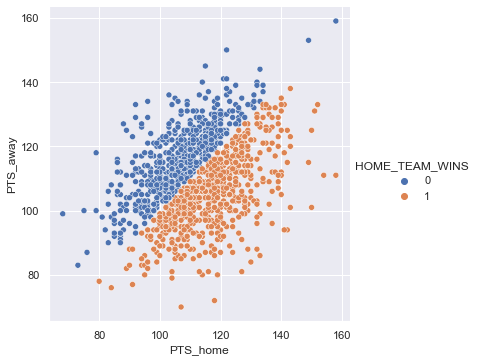

In [42]:

sns.relplot(x="PTS_home", y="PTS_away", hue="HOME_TEAM_WINS", data=df);

<AxesSubplot:title={'center':'Cumulative Points Per Team if They are Home'}, xlabel='Home Team', ylabel='Total Points'>

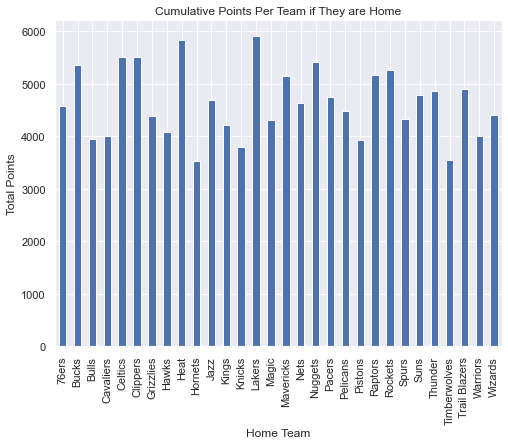

In [31]:
dfg = df.groupby (['NICKNAME'])['PTS_home'].sum()
dfg.plot(kind='bar', title='Cumulative Points Per Team if They are Home', ylabel='Total Points',
         xlabel='Home Team')

### Prelimary Machine Learning
To do